If you run into this error:
> ---------------------------------------------------------------------------
``` ModuleNotFoundError                       Traceback (most recent call last)
<ipython-input-2-a825e4b73726> in <cell line: 9>()
      7 import seaborn as sns
      8
----> 9 from pycaret.clustering import *
     10 from sklearn.cluster import KMeans
     11 from sklearn.metrics import silhouette_score
ModuleNotFoundError: No module named 'pycaret'

**Go to runtime then restart the kernel. It should work.**

# Import
- https://towardsdatascience.com/clustering-made-easy-with-pycaret-656316c0b080

In [1]:
# !pip install --user --upgrade tables
# !pip install --user pycaret
# !pip install pycaret[full]==2.3.4
!pip install pycaret
# Install or upgrade required libraries
!pip install pandas scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.9 M

In [2]:
from google.colab import drive
drive.mount('/content/drive')
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pycaret.clustering import *
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

Mounted at /content/drive


In [3]:
region=10
csv_file_path = f'/content/drive/MyDrive/MS thesis/HFCAI/RG{region}/rg{region}_HCFAI_sum.csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)
df.sort_values(by='HCFAI', ascending=False).head(2)

,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,POI_Presence,Nearest_RHU,Distance_to_Nearest_RHU_km,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you,HCFAI
3900,3215605,Canoayan,Bayog,Zamboanga del Sur,0.308316,0.853801,0.906865,1.0,0,1,1,3225286,16.454514,50.703496,13.683216,325.647816,149.504500,69.295960,64.508868,0.611217
4082,3219751,Bobuan,Bayog,Zamboanga del Sur,0.287830,0.856641,0.921854,1.0,0,1,1,3225286,13.329357,26.699804,6.223025,150.229388,72.556665,32.650518,27.851838,0.610389


In [4]:
for i in df.columns:
  print(i)

ID
barangay_name
city_name
province_name
flood_probability_value
rain intensity_value
drought_value
buildability_landcov
RHU_Presence
Road_Presence
POI_Presence
Nearest_RHU
Distance_to_Nearest_RHU_km
popden_chi
popden_eld
popden_all
popden_wom
popden_w_1
popden_you
HCFAI


# K-means on HCFAI

## train

In [5]:
IDonly = df['ID']
IDdf = IDonly.to_frame()
IDdf

,ID
0,3089928
1,3091284
2,3091285
3,3092661
4,3092662
...,...
6736,3280556
6737,3280561
6738,3280562
6739,3280563


In [6]:
HCIdf = df[['HCFAI']]
# HCIdf = HCIdf.to_frame()
cluster = setup(HCIdf, session_id = 7652)

,Description,Value
0,Session id,7652
1,Original data shape,"(6741, 1)"
2,Transformed data shape,"(6741, 1)"
3,Numeric features,1
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


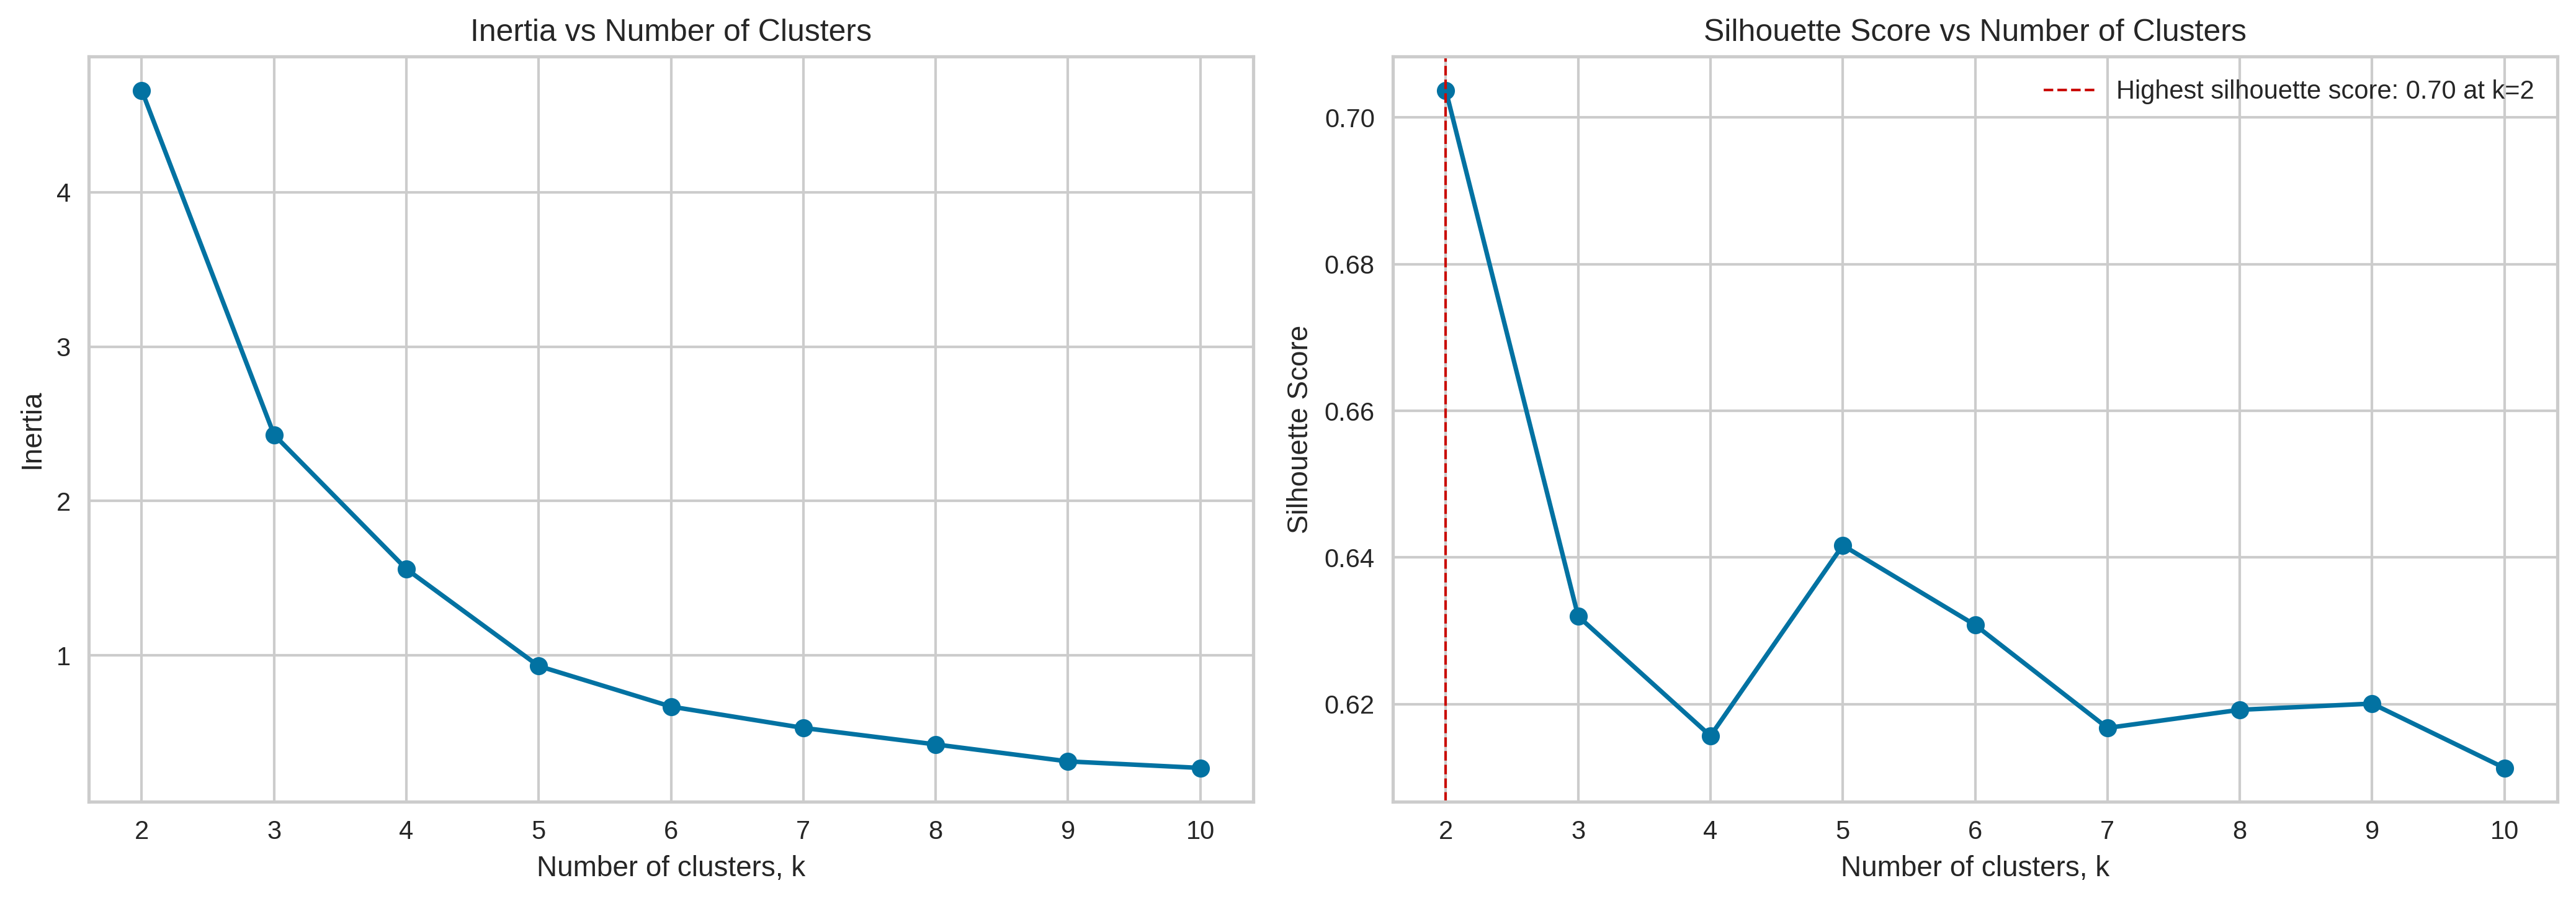

In [7]:
# Initialize lists to store inertia and silhouette scores
k_values = range(2, 11)
inertia_values = []
silhouette_scores = []

for k in k_values:
    # Create KMeans model
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(HCIdf)

    # Calculate inertia
    inertia = kmeans.inertia_
    inertia_values.append(inertia)

    # Calculate silhouette score
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(HCIdf, labels)
    silhouette_scores.append(silhouette_avg)

max_silhouette_score = max(silhouette_scores)
min_intertia_score = min(inertia_values)
max_silhouette_k = k_values[silhouette_scores.index(max_silhouette_score)]
min_intertia_k = k_values[inertia_values.index(min_intertia_score)]

# Plot the results
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')
# plt.axvline(x=min_intertia_k, color='b', linestyle='--', linewidth=1, label=f'Lowest intertia score: {min_intertia_k:.2f} at k={min_intertia_k}')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.axvline(x=max_silhouette_k, color='r', linestyle='--', linewidth=1, label=f'Highest silhouette score: {max_silhouette_score:.2f} at k={max_silhouette_k}')
plt.xlabel('Number of clusters, k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.legend()

plt.tight_layout()
plt.show()

In [8]:
model = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6244,27483.6161,0.4990,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

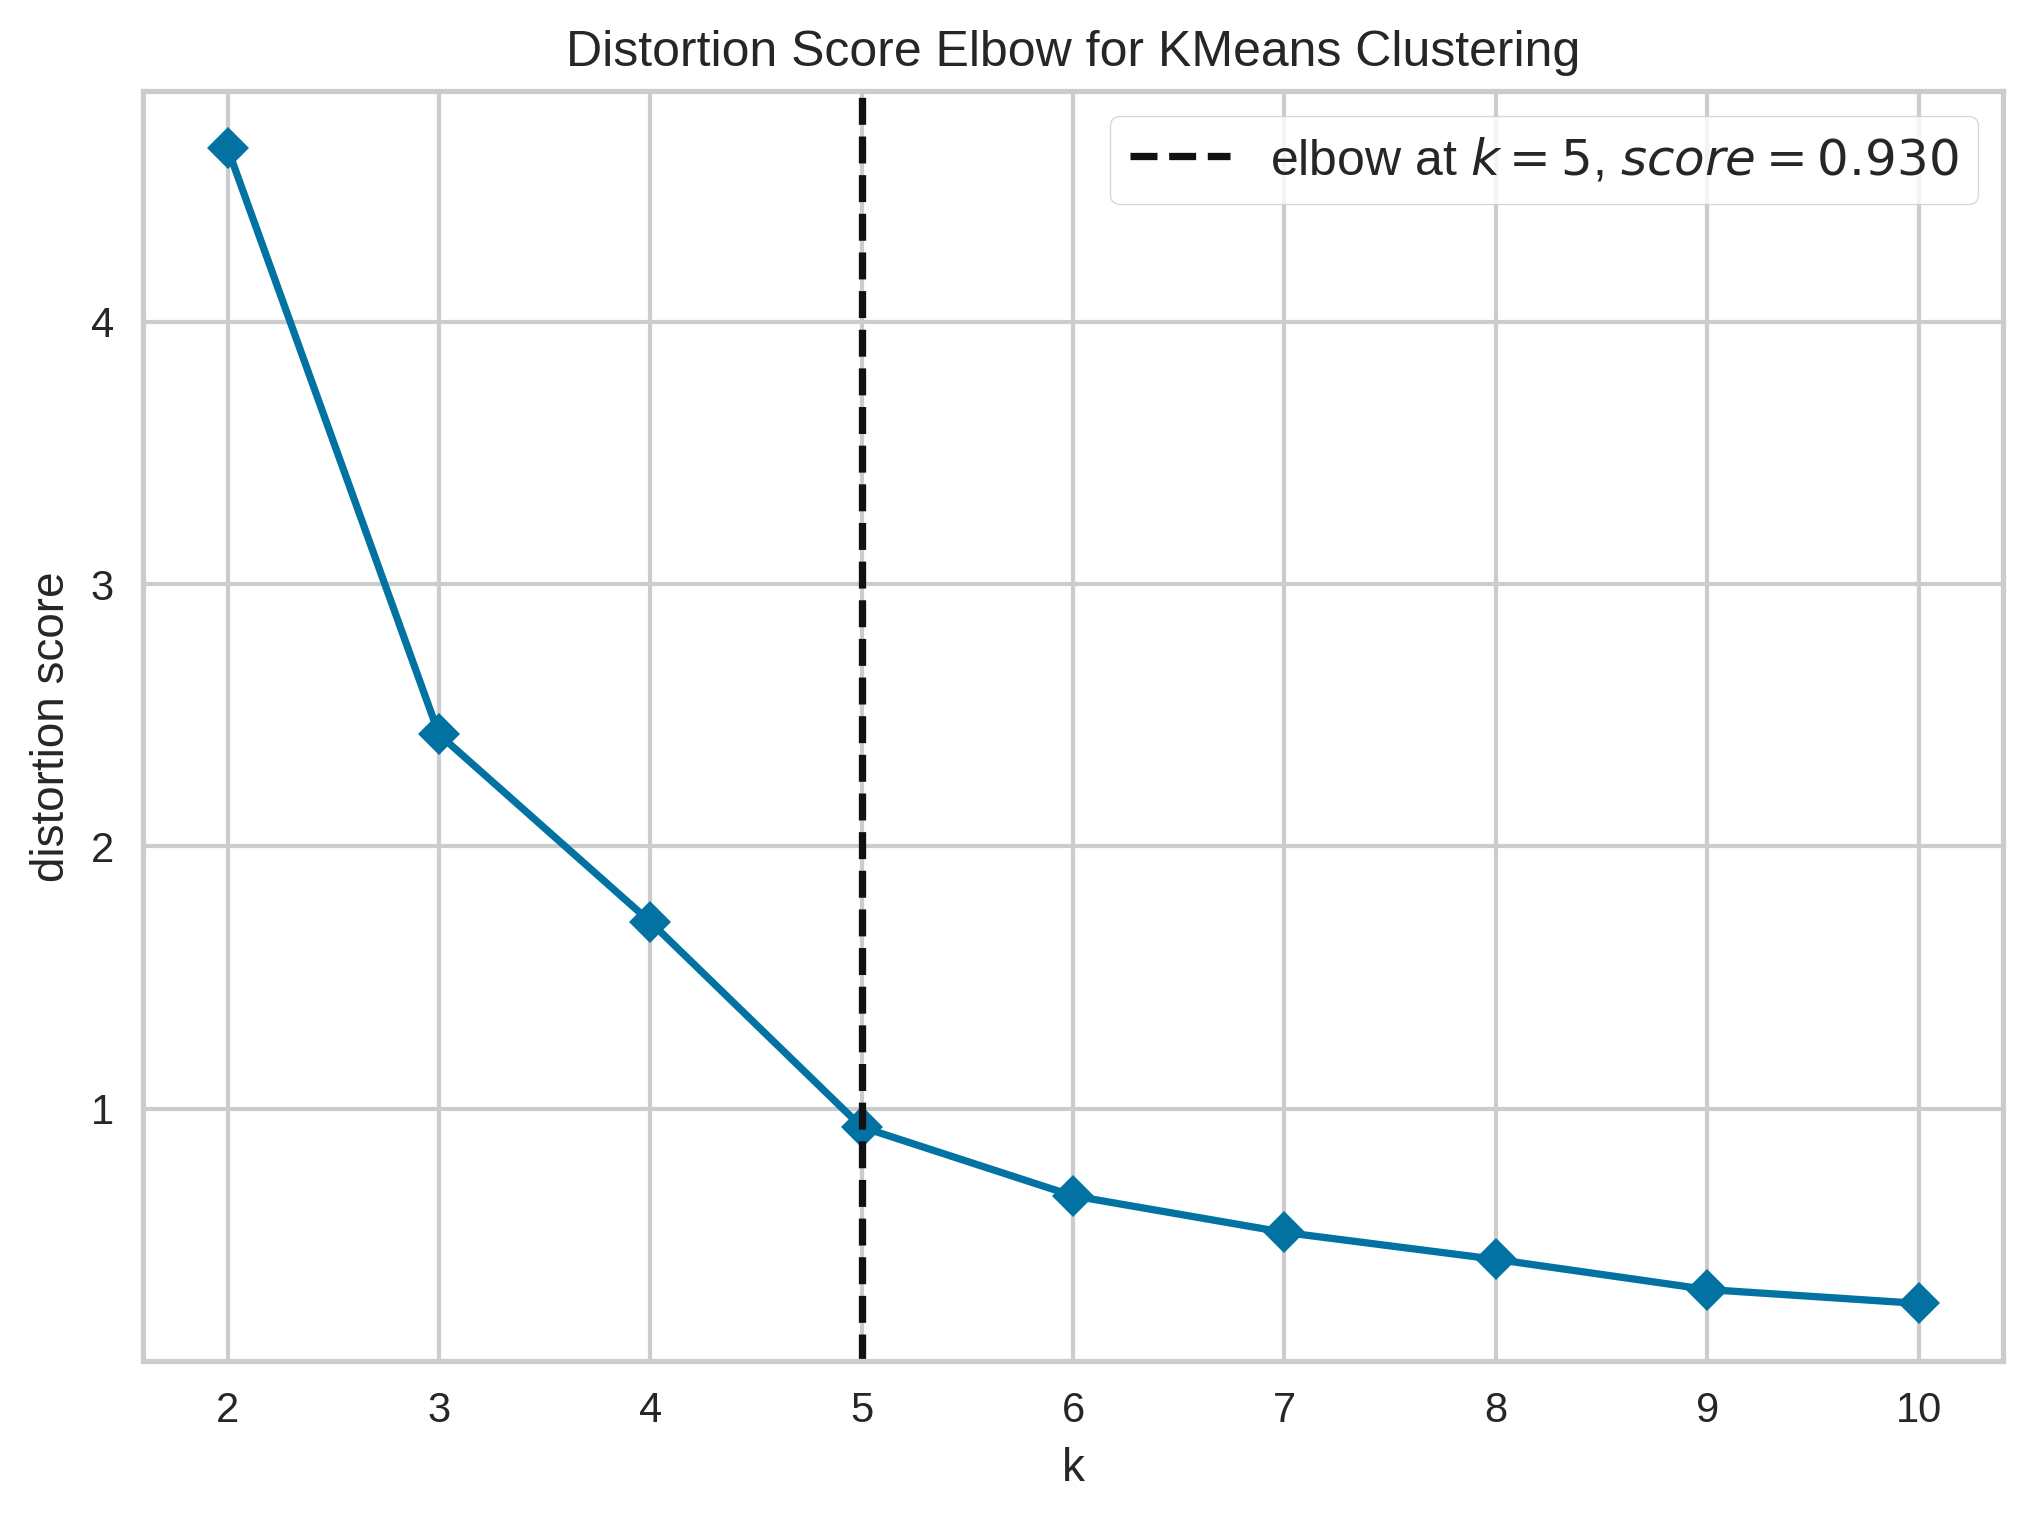

In [9]:
plot_model(model, 'elbow')

### K-means clustering model validation:
1. Intertia score
2. Silhouette score

```
Refer to comments from panel
```



In [10]:
# Evaluate the model
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Apply model on data

In [11]:
model = create_model('kmeans', num_clusters = 2)
plot_model(model,  plot = 'distribution')
# plot_model(model, 'cluster')
save_model(model, f'/content/drive/MyDrive/MS thesis/preliminary site selection/RG{region}/rg{region}-HCFAI-Clusters-silhouette')
HCFAIdf_results = assign_model(model)
HCFAIdf_results.head(10)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7037,26031.0884,0.4009,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved


,HCFAI,Cluster
0,0.475942,Cluster 1
1,0.386062,Cluster 0
2,0.500000,Cluster 1
3,0.505834,Cluster 1
4,0.505370,Cluster 1
5,0.498062,Cluster 1
6,0.512649,Cluster 1
7,0.498479,Cluster 1
8,0.495163,Cluster 1
9,0.490203,Cluster 1


In [12]:
model = create_model('kmeans', num_clusters = 5)
plot_model(model,  plot = 'distribution')
# plot_model(model, 'cluster')
save_model(model, f'/content/drive/MyDrive/MS thesis/preliminary site selection/RG{region}/rg{region}-HCFAI-Clusters-inertia')
HCFAIdf_results = assign_model(model)
HCFAIdf_results.head(10)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6417,39357.1787,0.4723,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved


,HCFAI,Cluster
0,0.475942,Cluster 2
1,0.386062,Cluster 4
2,0.500000,Cluster 1
3,0.505834,Cluster 1
4,0.505370,Cluster 1
5,0.498062,Cluster 1
6,0.512649,Cluster 1
7,0.498479,Cluster 1
8,0.495163,Cluster 1
9,0.490203,Cluster 1


# Fixing df for BPNN to find candidate locations

In [ ]:
HCFAIdf_results

,HCFAI,Cluster
0,0.475942,Cluster 2
1,0.386062,Cluster 4
2,0.500000,Cluster 1
3,0.505834,Cluster 1
4,0.505370,Cluster 1
...,...,...
6736,0.399266,Cluster 4
6737,0.491719,Cluster 1
6738,0.500000,Cluster 1
6739,0.378333,Cluster 0


In [ ]:
HCFAIdf_results.rename(columns={'Cluster': 'Accessibility Level'}, inplace=True)

lists = {}

for cluster_number in range(len(HCFAIdf_results['Accessibility Level'].unique())):
  cluster_name = f"Cluster {cluster_number}"
  cluster_list = HCFAIdf_results.loc[HCFAIdf_results['Accessibility Level'] == cluster_name, 'HCFAI'].tolist()
  lists[cluster_name] = cluster_list

for cluster_name, cluster_list in lists.items():
    # print(f"Cluster {cluster_name}: {cluster_list}")
    print(f"max, min, total {max(cluster_list)} | {min(cluster_list)} | {len(cluster_list)}")

x = HCFAIdf_results['HCFAI'].notna() # removing nan values
x = HCFAIdf_results[x]
x.sort_values(by='HCFAI', ascending=False)

max, min, total 0.3827095627784729 | 0.3330862522125244 | 1291
max, min, total 0.519791305065155 | 0.4771132171154022 | 2708
max, min, total 0.47707250714302063 | 0.4309695363044739 | 1315
max, min, total 0.6112170815467834 | 0.5199146270751953 | 370
max, min, total 0.4308861792087555 | 0.38278791308403015 | 1057


,HCFAI,Accessibility Level
3900,0.611217,Cluster 3
4082,0.610389,Cluster 3
4138,0.610231,Cluster 3
6571,0.608679,Cluster 3
4332,0.607284,Cluster 3
...,...,...
3450,0.334163,Cluster 0
2723,0.333693,Cluster 0
3274,0.333461,Cluster 0
2594,0.333358,Cluster 0


In [ ]:
x = x.replace(['Cluster 0'],int(0))
x = x.replace(['Cluster 1'],int(0))
x = x.replace(['Cluster 2'],int(0))
x = x.replace(['Cluster 3'],int(1))
x = x.replace(['Cluster 4'],int(0))

x['ID'] = IDdf

df = df.merge(x, how='left', on='ID')
df = df.drop_duplicates('ID')
# df = df.drop(['Accessibility Level_x','Accessibility Level_y'], axis=1)
df.rename(columns = {'Accessibility Level':'Cluster', 'HCFAI_y': 'HCFAI'}, inplace = True)
# df[df['Cluster'] == 1]
df

,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,...,Distance_to_Nearest_RHU_km,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you,HCFAI_x,HCFAI,Cluster
0,3089928,Lampinigan,City of Isabela,City of Isabela (Not a Province),0.005814,0.639172,0.886348,0.0,0,0,...,144.285773,29.604690,6.301980,195.361578,89.986500,48.510648,40.889628,0.475942,0.475942,0
1,3091284,Labuan,City of Zamboanga,Zamboanga del Sur,0.862677,0.692668,0.775687,0.0,0,0,...,108.161299,0.477357,0.182746,3.534725,1.753495,0.896162,0.746083,0.386062,0.386062,0
2,3091285,Patalon,City of Zamboanga,Zamboanga del Sur,0.860924,0.684306,0.774227,0.0,0,0,...,109.297085,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0
3,3092661,Limpapa,Sibuco,Zamboanga del Norte,0.307618,0.707167,0.795544,1.0,0,0,...,102.518413,113.679666,20.155993,725.614745,360.388638,165.278883,146.735419,0.505834,0.505834,0
4,3092662,Limpapa,City of Zamboanga,Zamboanga del Sur,0.924451,0.701072,0.784552,1.0,0,0,...,103.489212,189.657126,77.213583,1416.342375,672.124428,340.492383,288.069039,0.505370,0.505370,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6736,3280556,Cabgan,Tambulig,Zamboanga del Sur,1.094718,0.700180,0.921706,0.0,0,0,...,38.617256,25.198884,6.675828,186.829080,88.666236,44.004036,39.490800,0.399266,0.399266,0
6737,3280561,Napo,Aurora,Zamboanga del Sur,0.467567,0.788969,0.919815,1.0,0,0,...,34.986894,1.779058,0.395403,11.889056,6.071485,2.936879,2.908605,0.491719,0.491719,0
6738,3280562,Napo,Aurora,Zamboanga del Sur,0.467567,0.788969,0.919815,1.0,0,0,...,34.481589,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0
6739,3280563,Ceboneg,Aurora,Zamboanga del Sur,0.517025,0.778193,0.927343,0.0,0,0,...,34.159398,4.498096,2.018376,35.350416,17.704042,8.938522,8.073504,0.378333,0.378333,0


In [ ]:
df.columns

Index(['ID', 'barangay_name', 'city_name', 'province_name',
       'flood_probability_value', 'rain intensity_value', 'drought_value',
       'buildability_landcov', 'RHU_Presence', 'Road_Presence', 'POI_Presence',
       'Nearest_RHU', 'Distance_to_Nearest_RHU_km', 'popden_chi', 'popden_eld',
       'popden_all', 'popden_wom', 'popden_w_1', 'popden_you', 'HCFAI_x',
       'HCFAI', 'Cluster'],
      dtype='object')

In [ ]:
df = df.drop(['HCFAI_x'], axis=1)
df.rename(columns = {'Accessibility Level_x':'Cluster'}, inplace = True)
df

,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,...,Nearest_RHU,Distance_to_Nearest_RHU_km,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you,HCFAI,Cluster
0,3089928,Lampinigan,City of Isabela,City of Isabela (Not a Province),0.005814,0.639172,0.886348,0.0,0,0,...,3165865,144.285773,29.604690,6.301980,195.361578,89.986500,48.510648,40.889628,0.475942,0
1,3091284,Labuan,City of Zamboanga,Zamboanga del Sur,0.862677,0.692668,0.775687,0.0,0,0,...,3165865,108.161299,0.477357,0.182746,3.534725,1.753495,0.896162,0.746083,0.386062,0
2,3091285,Patalon,City of Zamboanga,Zamboanga del Sur,0.860924,0.684306,0.774227,0.0,0,0,...,3165865,109.297085,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0
3,3092661,Limpapa,Sibuco,Zamboanga del Norte,0.307618,0.707167,0.795544,1.0,0,0,...,3165865,102.518413,113.679666,20.155993,725.614745,360.388638,165.278883,146.735419,0.505834,0
4,3092662,Limpapa,City of Zamboanga,Zamboanga del Sur,0.924451,0.701072,0.784552,1.0,0,0,...,3165865,103.489212,189.657126,77.213583,1416.342375,672.124428,340.492383,288.069039,0.505370,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6736,3280556,Cabgan,Tambulig,Zamboanga del Sur,1.094718,0.700180,0.921706,0.0,0,0,...,3247400,38.617256,25.198884,6.675828,186.829080,88.666236,44.004036,39.490800,0.399266,0
6737,3280561,Napo,Aurora,Zamboanga del Sur,0.467567,0.788969,0.919815,1.0,0,0,...,3247400,34.986894,1.779058,0.395403,11.889056,6.071485,2.936879,2.908605,0.491719,0
6738,3280562,Napo,Aurora,Zamboanga del Sur,0.467567,0.788969,0.919815,1.0,0,0,...,3247400,34.481589,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0
6739,3280563,Ceboneg,Aurora,Zamboanga del Sur,0.517025,0.778193,0.927343,0.0,0,0,...,3247400,34.159398,4.498096,2.018376,35.350416,17.704042,8.938522,8.073504,0.378333,0


In [ ]:
df.to_csv(f'/content/drive/MyDrive/MS thesis/preliminary site selection/RG{region}/rg{region}_clusters.csv')